In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [3]:
loan = pd.read_csv(r'C:\Users\ppawa\Pranav\Study\Engineering\SEM 5\ML\Lab\ML-Labs\Loan Approval.csv')  
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


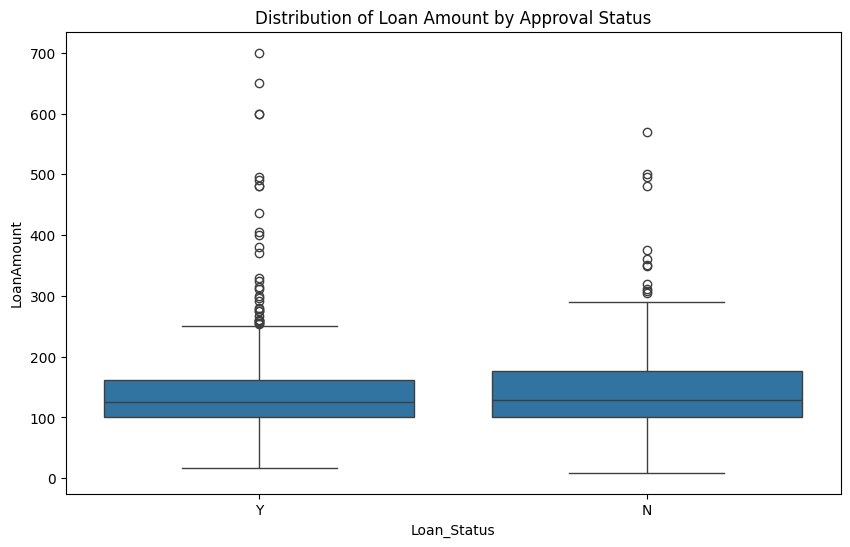

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='LoanAmount', data=loan)
plt.title('Distribution of Loan Amount by Approval Status')
plt.show()

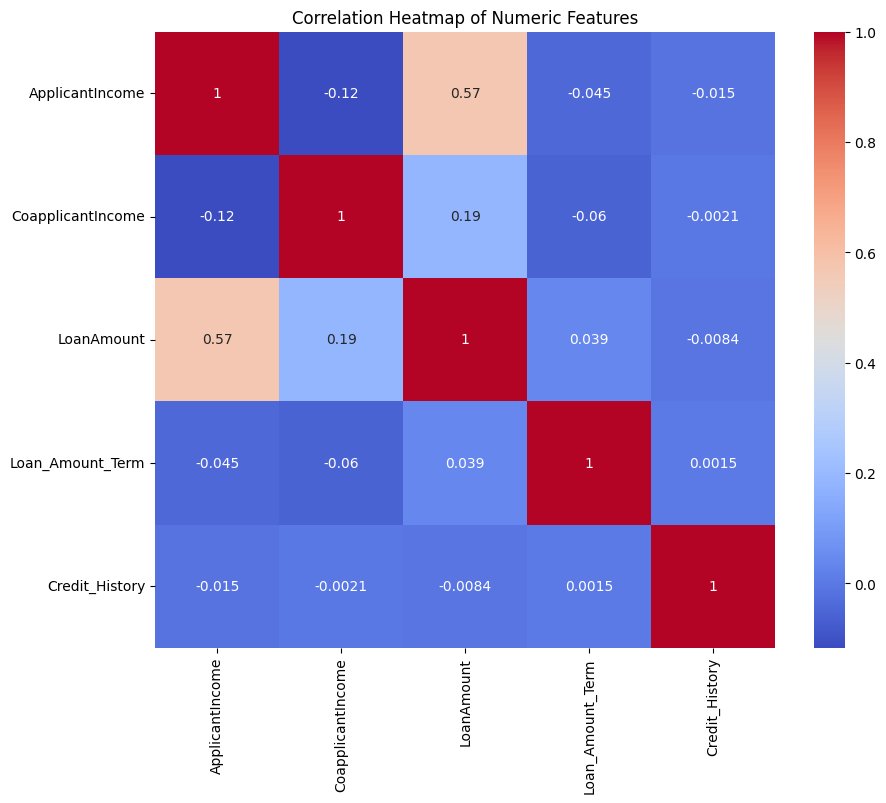

In [14]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
plt.figure(figsize=(10, 8))
sns.heatmap(loan[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

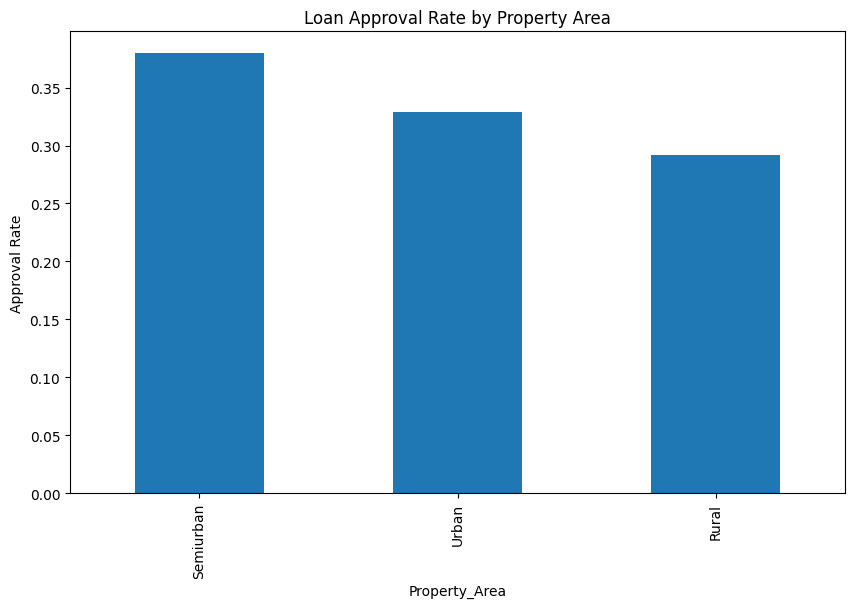

In [16]:
plt.figure(figsize=(10, 6))
loan['Property_Area'].value_counts(normalize=True).plot(kind='bar')
plt.title('Loan Approval Rate by Property Area')
plt.ylabel('Approval Rate')
plt.show()

In [5]:
X = loan[['ApplicantIncome']]
y = loan['Loan_Status']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [7]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

In [8]:
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           N       0.26      0.14      0.18        43
           Y       0.63      0.79      0.70        80

    accuracy                           0.56       123
   macro avg       0.45      0.46      0.44       123
weighted avg       0.50      0.56      0.52       123

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           N       0.38      0.07      0.12        43
           Y       0.65      0.94      0.77        80

    accuracy                           0.63       123
   macro avg       0.51      0.50      0.44       123
weighted avg       0.56      0.63      0.54       123



In [9]:
rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

In [21]:
def evaluate_model(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label='Y')
    recall = recall_score(y_true, y_pred, pos_label='Y')
    f1 = f1_score(y_true, y_pred, pos_label='Y')
    auc_roc = roc_auc_score(y_true, y_pred_proba)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")

In [22]:
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
print("Random Forest Evaluation:")
evaluate_model(y_test, y_pred_rf, y_pred_proba_rf)

y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]
print("\nGradient Boosting Evaluation:")
evaluate_model(y_test, y_pred_gb, y_pred_proba_gb)

Random Forest Evaluation:
Accuracy: 0.5610
Precision: 0.6300
Recall: 0.7875
F1 Score: 0.7000
AUC-ROC: 0.4817

Gradient Boosting Evaluation:
Accuracy: 0.6341
Precision: 0.6522
Recall: 0.9375
F1 Score: 0.7692
AUC-ROC: 0.4634


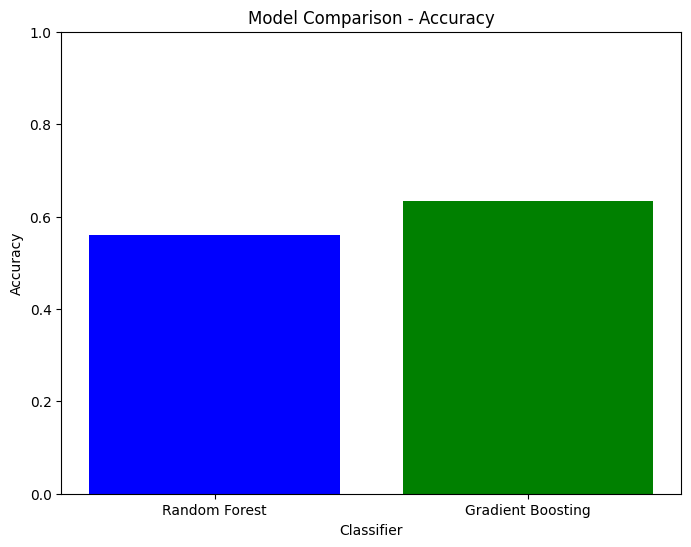

In [10]:
plt.figure(figsize=(8, 6))
plt.bar(['Random Forest', 'Gradient Boosting'], [rf_accuracy, gb_accuracy], color=['blue', 'green'])
plt.title('Model Comparison - Accuracy')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

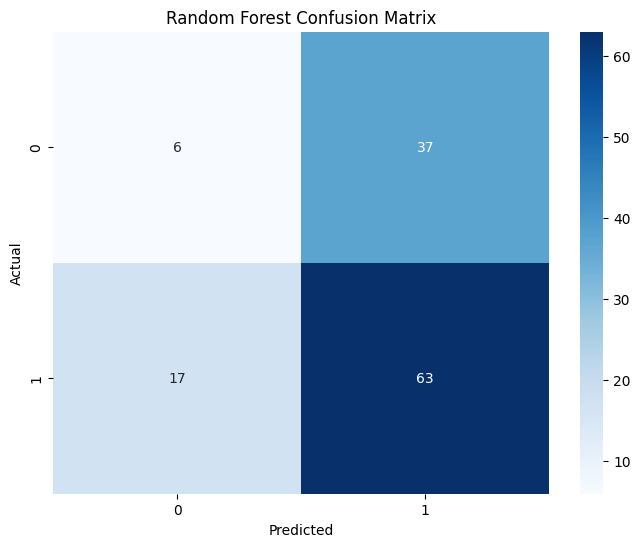

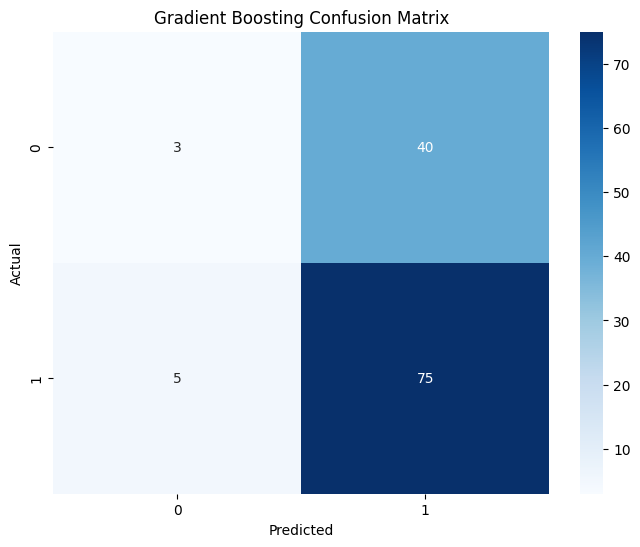

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_confusion_matrix(y_test, y_pred_gb, "Gradient Boosting Confusion Matrix")